In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 6.6MB/s 


In [0]:
downloaded = drive.CreateFile({'id':'1PitgBL1Yl0AvHjwx0W9lqcvoArPCGxBz'}) 
downloaded.GetContentFile('Mura.zip')  

In [0]:
!ls

adc.json  Mura.zip  sample_data


In [0]:
from zipfile import ZipFile
mura=ZipFile('Mura.zip')

In [0]:
mura.extractall()

In [0]:
!ls

adc.json  MURA-v1.1  Mura.zip  sample_data


In [0]:
from keras.preprocessing import image
import pandas as pd
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def prepareImages():
	imgdata=[]
	df=pd.read_csv('MURA-v1.1/train_image_paths.csv',names=['Path'])
	imagearray=df['Path'].values
	print(imagearray)
	path=""
	for i in imagearray:
		imagepath=path+i
		im=image.load_img(imagepath,target_size=(100,100,3))
		x1=image.img_to_array(im)
		x1=preprocess_input(x1)
		
		imgdata.append(x1)

	image_data=np.array(imgdata)
	np.save('image.npy',image_data)
	print(image_data.shape)
	return image_data

def prepareLabels():
	df=pd.read_csv('MURA-v1.1/train_image_paths.csv',names=['Path'])
	names=df['Path'].values
	values=[]
	for i in names:
		if ('positive' in i):
			values.append('1')
		elif('negative' in i):
			values.append('0')

	print(len(values))
	label_encoder = LabelEncoder()
	integer_encoded = label_encoder.fit_transform(values)
	onehot_encoder = OneHotEncoder(sparse=False)
	integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
	onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
	return integer_encoded





Using TensorFlow backend.


36808
Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/15
36808/36808 [==============================] - 471s 13ms/step - loss: 0.9435 - acc: 0.5646
Epoch 2/15
36808/36808 [==============================] - 430s 12ms/step - loss: 0.8583 - acc: 0.5823
Epoch 3/15
36808/36808 [==============================] - 429s 12ms/step - loss: 0.8462 - acc: 0.5931
Epoch 4/15
36808/36808 [==============================] - 430s 12ms/step - loss: 0.8482 - acc: 0.5927
Epoch 5/15
36808/36808 [==============================] - 429s 12ms/step - loss: 0.9279 - acc: 0.5935
Epoch 6/15
36808/36808 [==============================] - 430s 12ms/step - loss: 0.9565 - acc: 0.5976
Epoch 7/15
36808/36808 [==============================] - 428s 12ms/step - loss: 0.9910 - acc: 0.5939
Epoch 8/15
36808/36808 [==============================] - 428s 12ms/step - loss: 0.9843 - acc: 0.5814
Epoch 9/15
36808/36808 [==============================] - 428s 12ms/step - loss: 0.9959 - acc: 0.5814
Epoch 10/15
36808/36808 [=========

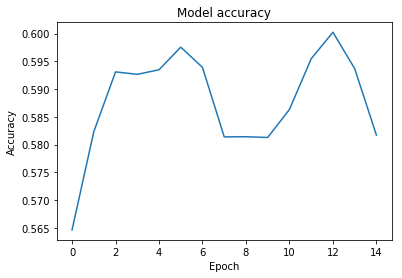

In [0]:

from keras import layers
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
import gc
import keras.backend as K
from keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
from keras.applications.densenet import DenseNet169
from keras.layers import Dense
from keras import optimizers
from keras.models import Model



def prepareModel():
    dense_169_model = DenseNet169(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
    dense_169_model.layers.pop()
    x = dense_169_model.output
    flat=Flatten()(x)
    predictions = Dense(1, activation='sigmoid')(flat)
    model = Model(inputs=dense_169_model.input, outputs=predictions)

    for layer in dense_169_model.layers:
        layer.trainable = True

    adam = optimizers.Adam(lr=0.001)
    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    
    return model





y_train=prepareLabels()
model=prepareModel()
X_train=np.load('image.npy')
X_train /= 255

history=model.fit(X_train,y_train,epochs=15,batch_size=32,verbose=1)
model.save('model.h5')
gc.collect()
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()



In [0]:
!ls

adc.json  image.npy  MURA-v1.1	Mura.zip  sample_data
